In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [86]:
dataset_path = '../Week2-LinearRegression/data/BTC-Daily.csv'
df = pd.read_csv(dataset_path)

df = df.drop_duplicates()
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


**EDA**

In [87]:
# Range of dates converted
df['date'] = pd.to_datetime(df['date'])
data_range = str(df['date'].dt.date.min()) + str(df['date'].dt.date.max())
print(data_range)

2014-11-282022-03-01


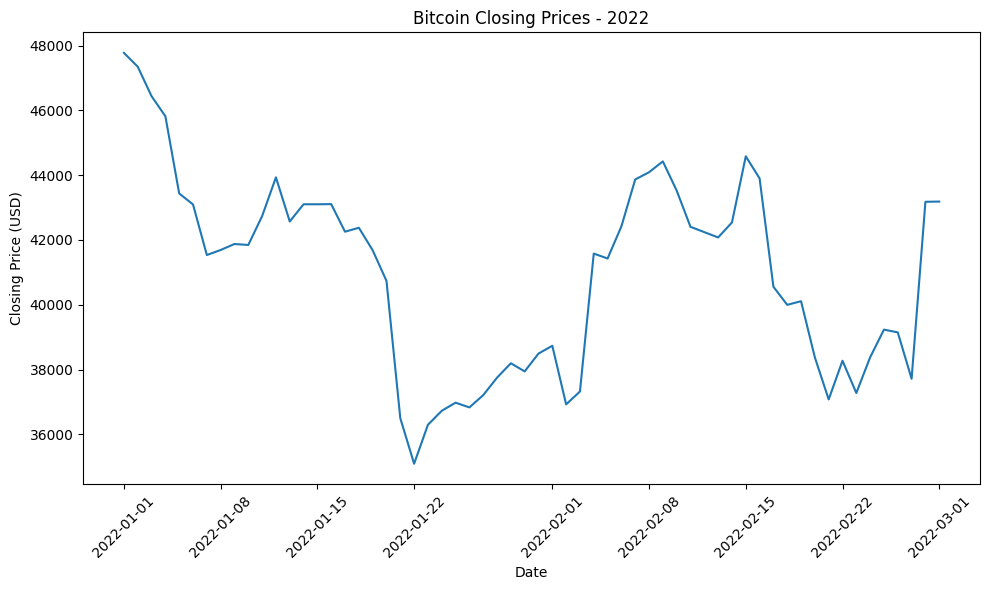

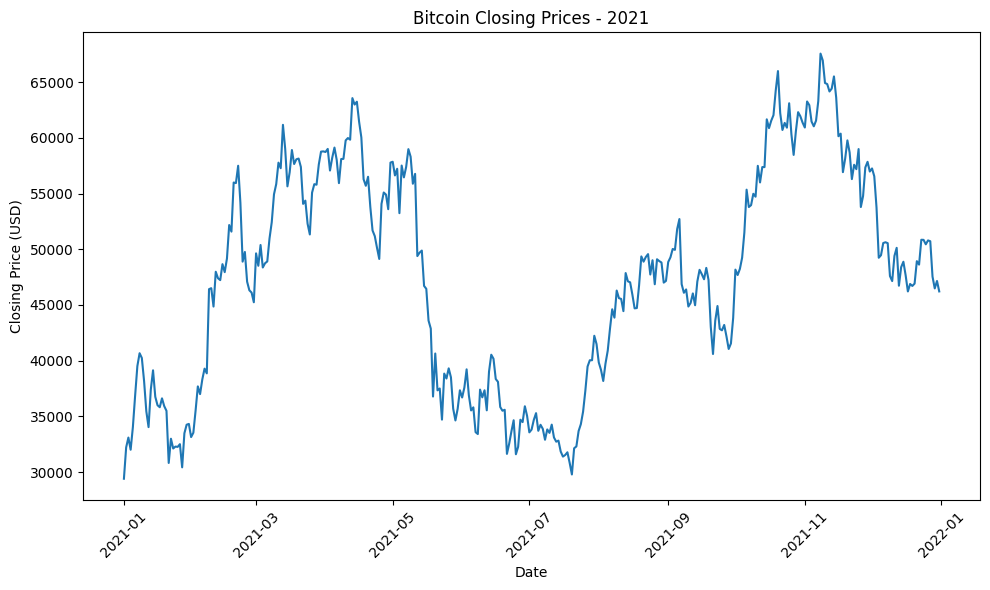

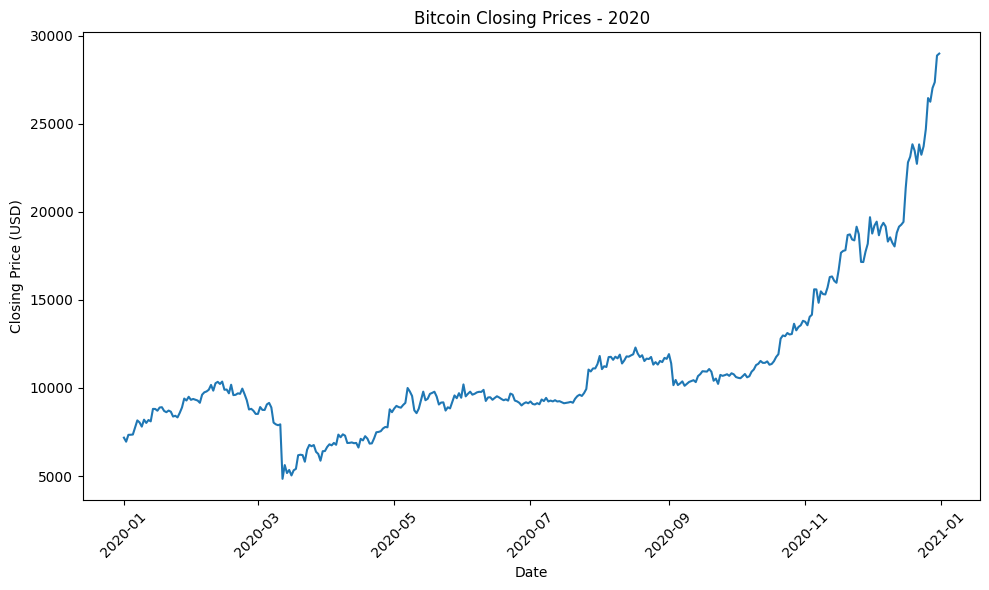

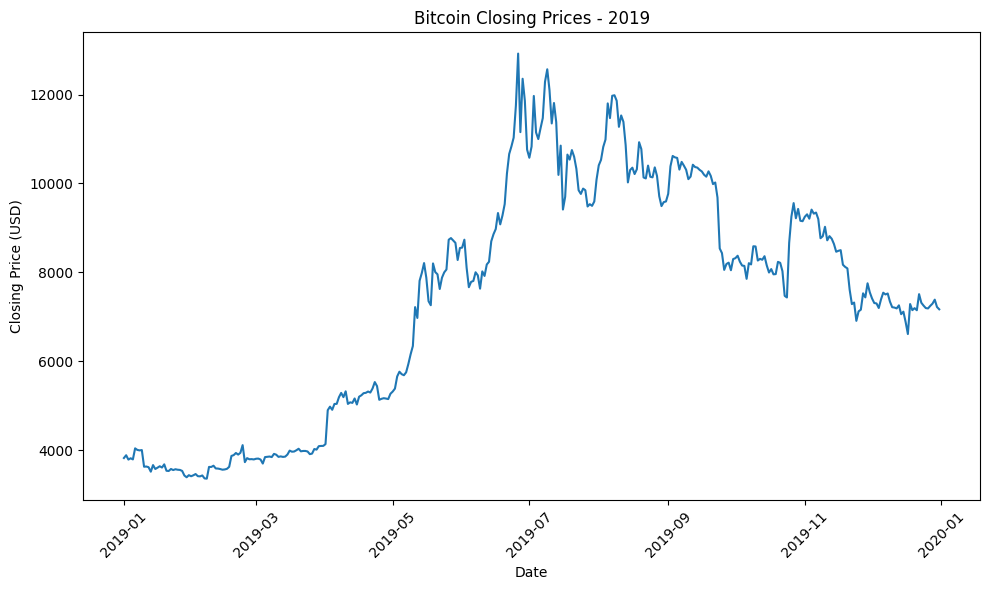

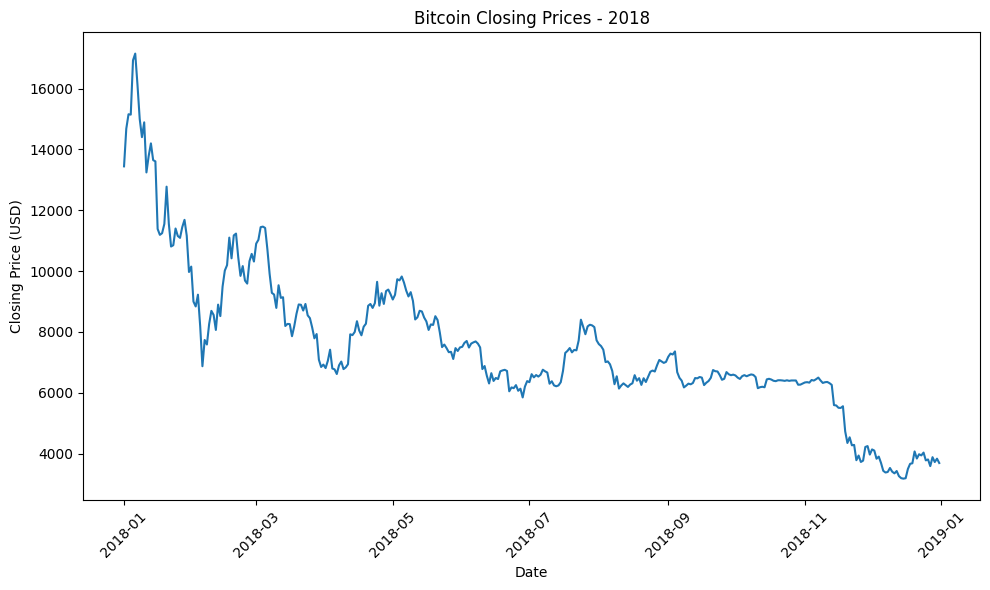

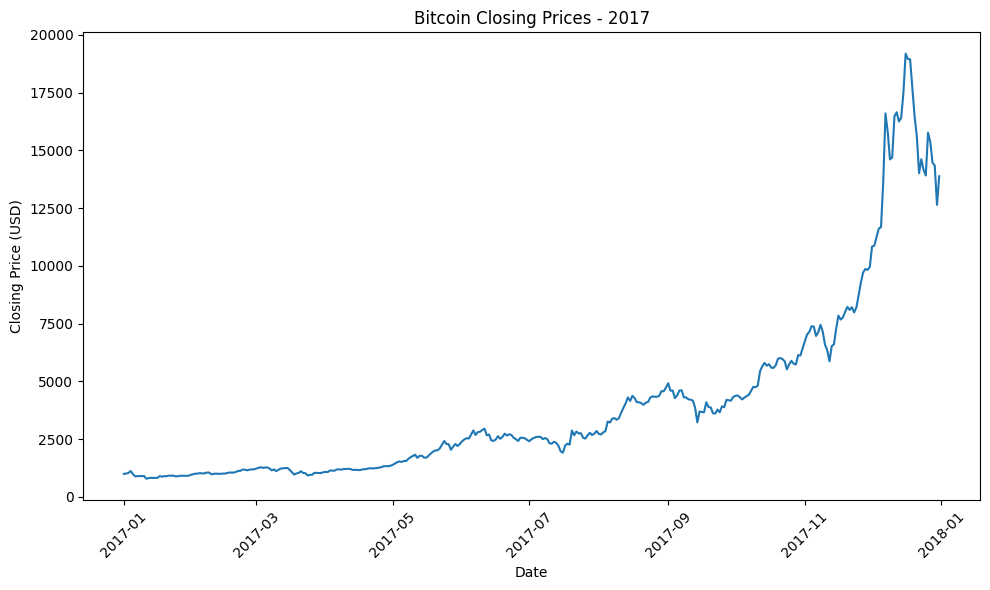

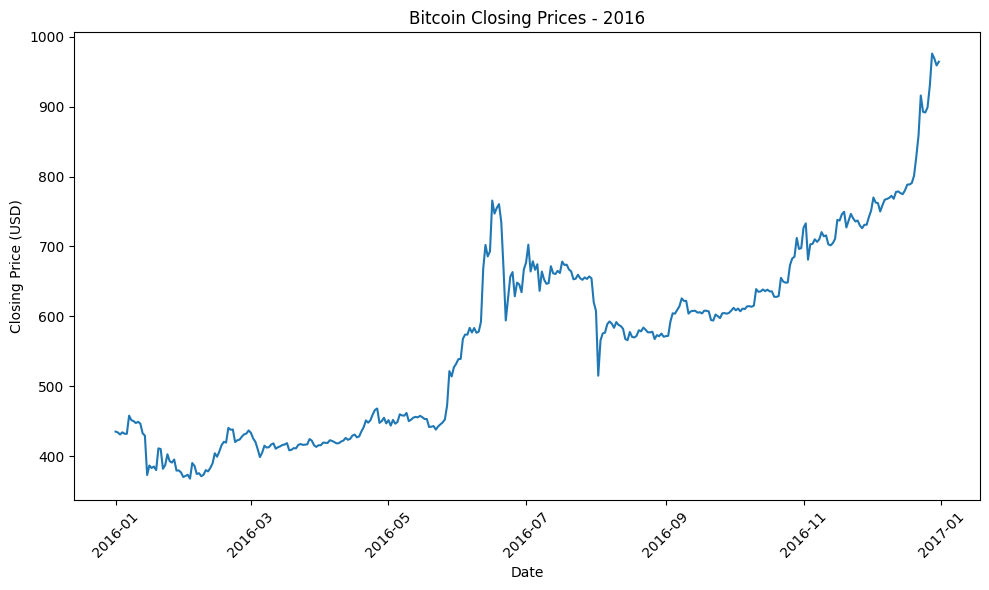

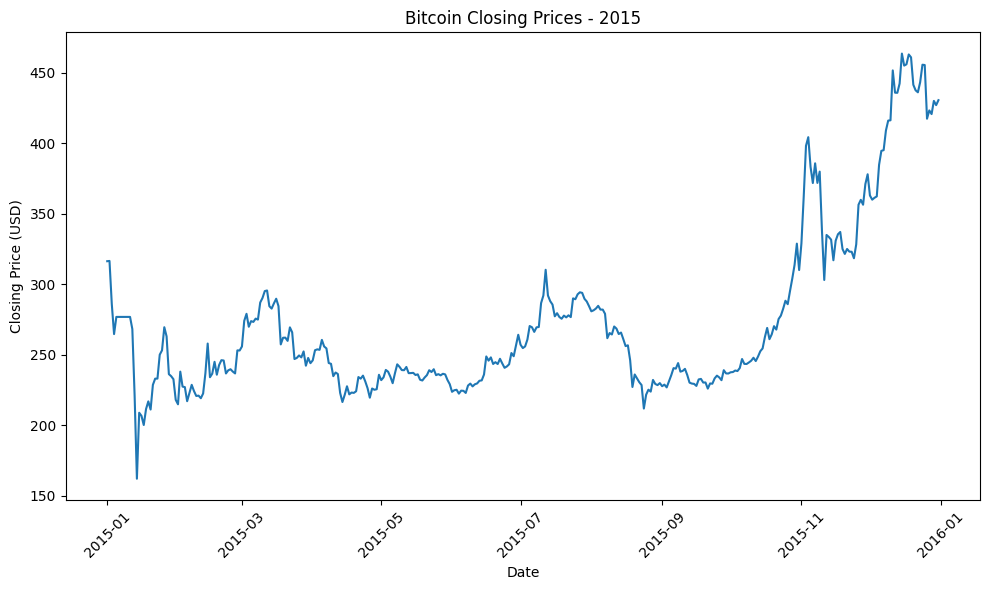

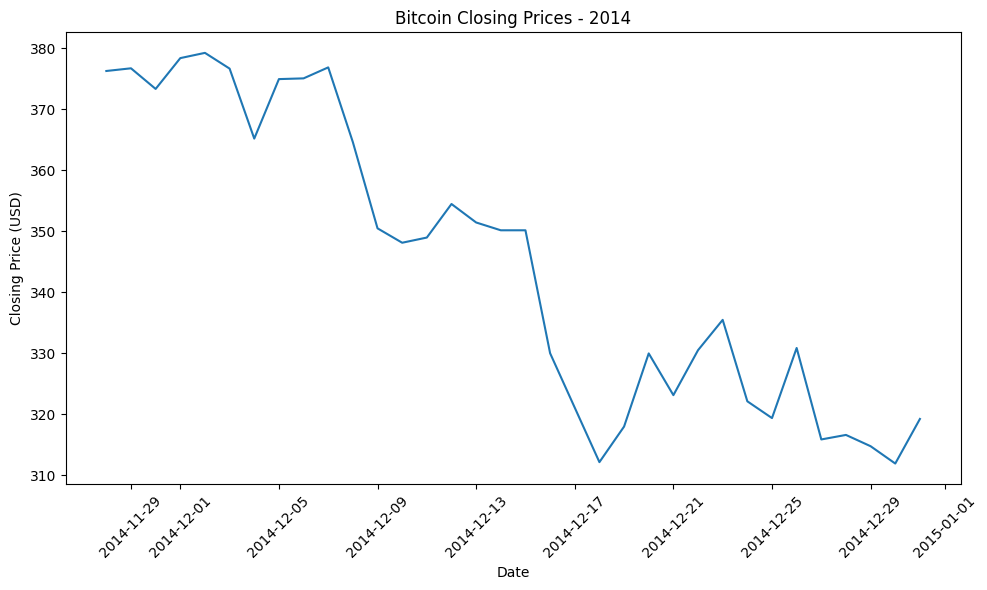

In [88]:
# Add day, month and year columns
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

unique_years = df['year'].unique()

for year in unique_years:
   df_year = df[df['year'] == year]

   year_month_day = pd.DataFrame({
    'year': df['year'],
    'month': df['month'],
    'day': df['day']
   })

   merged_data = pd.merge(year_month_day, df_year, on=['year', 'month', 'day'], how='left')

   # Plot
   plt.figure(figsize=(10, 6))
   plt.plot(merged_data['date'], merged_data['close'])
   plt.title(f'Bitcoin Closing Prices - {year}')
   plt.xlabel('Date')
   plt.ylabel('Closing Price (USD)')
   plt.xticks(rotation=45)
   plt.tight_layout()
   plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_5448\3646914839.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


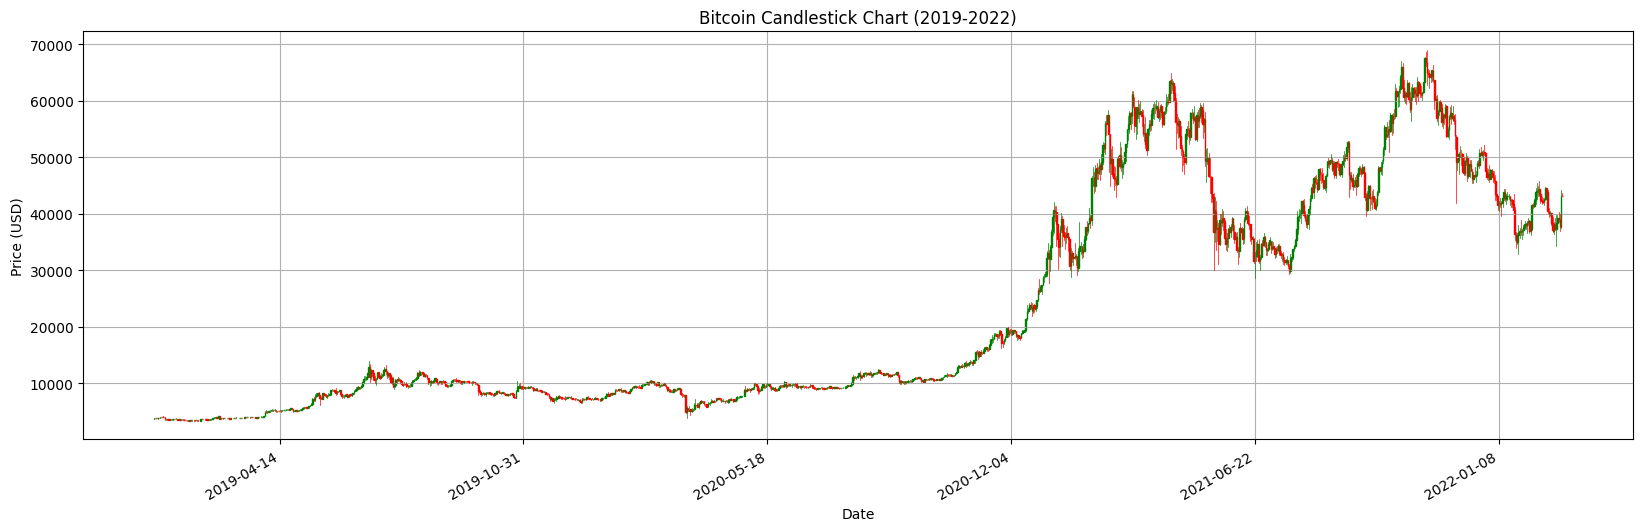

In [75]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import pandas as pd

df['date'] = pd.to_datetime(df['date'])

# Filter data for the years 2019-2022
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

# Convert 'date' to matplotlib date format for candlestick_ohlc
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize=(20, 6))
candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values, width=0.6, colorup='g', colordown='r')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

# Set titles and labels
plt.title('Bitcoin Candlestick Chart (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Save the plot as a PDF
plt.savefig('bitcoin_candlestick_2019_2022.pdf')

plt.show()

**Linear Regression**

In [89]:
def predict(X, w, b):
   return X.dot(w) + b

def gradient(y_hat, y, x):
   m = len(x)

   loss = (y_hat - y) ** 2
   coss = np.sum(loss) / (2*m)

   db = (1 / m) * 2 * np.sum(y_hat - y)
   dw = (1 / m) * 2 * x.T.dot(y_hat - y)

   return coss, dw, db

def update_weights(w, b, lr, dw, db):
   w_new = w - lr * dw
   b_new = b - lr * db
   return w_new, b_new



**DATA NORMALIZE / SPLIT DATA**

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

df["Close"] = scaler.fit_transform(df["close"].values.reshape(-1,1))
df["Open"] = scaler.fit_transform(df["open"].values.reshape(-1,1))
df["High"] = scaler.fit_transform(df["high"].values.reshape(-1,1))
df["Low"] = scaler.fit_transform(df["low"].values.reshape(-1,1))

X = df[['Open', 'High', 'Low']]
y = df['Close']

# X = df[['open', 'high', 'low']]
# y = df['close']

X_scaler = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.3, random_state=42, shuffle=True)
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,day,month,year,Close,Open,High,Low
0,1646092800,2022-03-01,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06,1,3,2022,1.933444,1.937893,1.887415,2.029161
1,1646006400,2022-02-28,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08,28,2,2022,1.933045,1.599553,1.925034,1.665409
2,1645920000,2022-02-27,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07,27,2,2022,1.597274,1.687421,1.663971,1.636567
3,1645833600,2022-02-26,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07,26,2,2022,1.685357,1.693320,1.690505,1.737377
4,1645747200,2022-02-25,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07,25,2,2022,1.690577,1.639126,1.654474,1.700955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03,2,12,2014,-0.695958,-0.695461,-0.696442,-0.694946
2647,1417392000,2014-12-01,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03,1,12,2014,-0.696010,-0.695584,-0.696475,-0.695086
2648,1417305600,2014-11-30,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03,30,11,2014,-0.696321,-0.695573,-0.696494,-0.695068
2649,1417219200,2014-11-29,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03,29,11,2014,-0.696113,-0.695583,-0.696218,-0.695136


**TRAINING**

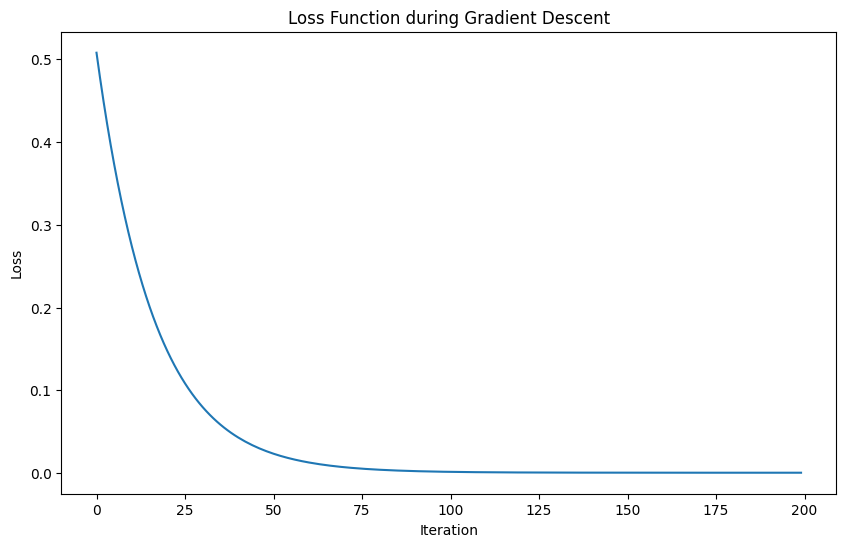

In [98]:
def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
   n_samples, n_features = X.shape
   w = np.zeros(n_features)
   b = 0
   losses = []
   
   for _ in range(num_iterations):
      # Predict
      y_hat = np.dot(X, w) + b

      # Compute the cost (Mean Squared Error)
      cost = (1 / (2 * n_samples)) * np.sum((y_hat - y) ** 2)

      # Compute gradients
      dw = (1 / n_samples) * np.dot(X.T, (y_hat - y))
      db = (1 / n_samples) * np.sum(y_hat - y)

      w -= learning_rate * dw
      b -= learning_rate * db

      losses.append(cost)

   return w, b, losses

w, b, losses = linear_regression_vectorized(X_train, y_train, learning_rate=0.01, num_iterations=200)

plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function during Gradient Descent')
plt.show()

**EVALUATE**

In [99]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = predict(X_test, w, b)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate R-squared on training data
y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

# Calculate R-squared on testing data
test_accuracy = r2_score(y_test, y_pred)

# Print results
print("Root Mean Square Error (RMSE):", round(rmse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Mean Absolute Percentage Error (MAPE):", round(mape, 4), "%")
print("Training Accuracy (R-squared):", round(train_accuracy, 4))
print("Testing Accuracy (R-squared):", round(test_accuracy, 4))

Root Mean Square Error (RMSE): 0.0293
Mean Absolute Error (MAE): 0.0138
Mean Absolute Percentage Error (MAPE): 5.8325 %
Training Accuracy (R-squared): 0.9989
Testing Accuracy (R-squared): 0.9991


**INFERENCE**

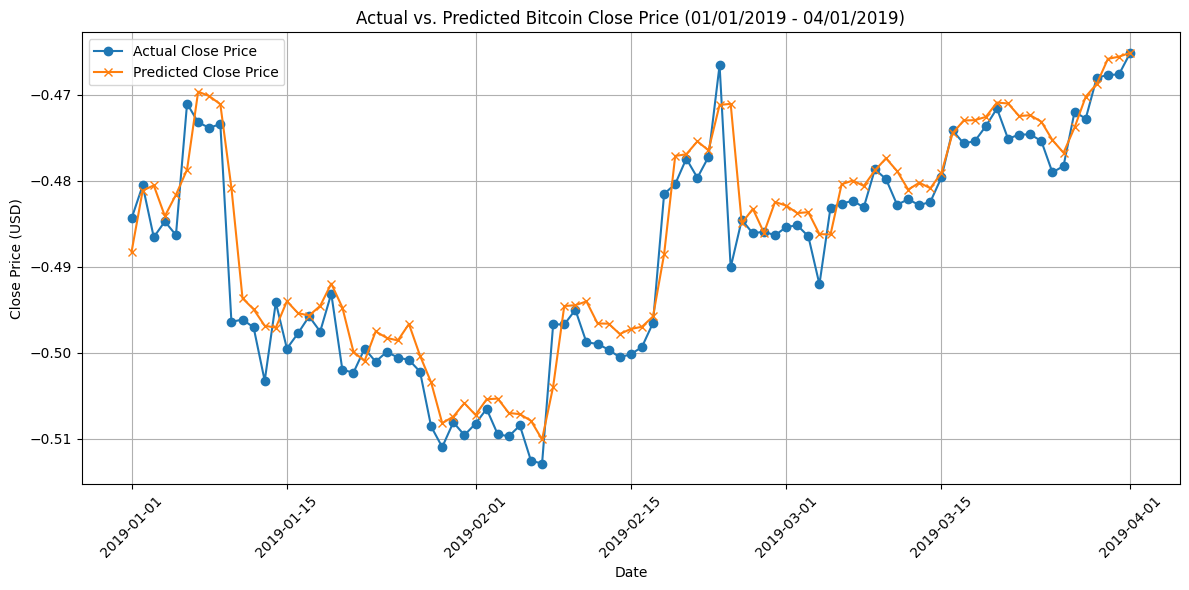

In [101]:
df_2019_q1 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-04-01')]

X_2019_q1 = df_2019_q1[["Open", "High", "Low"]]
y_2019_q1_actual = df_2019_q1["Close"]

y_2019_q1_pred = predict(X_2019_q1, w, b)

plt.figure(figsize=(12, 6))
plt.plot(df_2019_q1['date'], y_2019_q1_actual, label='Actual Close Price', marker='o')
plt.plot(df_2019_q1['date'], y_2019_q1_pred, label='Predicted Close Price', marker='x')
plt.title('Actual vs. Predicted Bitcoin Close Price (01/01/2019 - 04/01/2019)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()